# Import Dataset

In [0]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ds10012","key":"7e8fcd5773f6e7de447364f3a4e52106"}'}

In [0]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 63 Feb 16 12:57 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
#Give permissions to change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
#get dataset locally
!kaggle competitions download -c data-storm-10

  0% 0.00/825k [00:00<?, ?B/s]
100% 825k/825k [00:00<00:00, 56.4MB/s]
  0% 0.00/660k [00:00<?, ?B/s]
100% 660k/660k [00:00<00:00, 92.1MB/s]
  0% 0.00/24.7k [00:00<?, ?B/s]
100% 24.7k/24.7k [00:00<00:00, 23.6MB/s]
  0% 0.00/213k [00:00<?, ?B/s]
100% 213k/213k [00:00<00:00, 69.4MB/s]


In [0]:
!mkdir train
!unzip credit_card_default_train.csv -d train

Archive:  credit_card_default_train.csv.zip
  inflating: train/credit_card_default_train.csv  


# UnderStand Data

In [0]:
#let see our data
import pandas as pd
from sklearn.utils import shuffle

credit = pd.read_csv('/content/train/credit_card_default_train.csv')
credit = shuffle(credit)
#It's easy to shuffle in the beginning compare to end
credit.head()

,Client_ID,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT
8282,A10322,400K,M,Other,Other,Less than 30,1,2,0,0,0,0,37507,36249,39547,41201,42495,43740,0,4620,2310,2310,2310,2310,0
11268,A14074,200K,F,High School,Other,31-45,0,0,0,0,0,0,114149,114454,35722,36269,28164,28910,2952,2760,998,1023,1215,672,0
23957,A29952,400K,F,Graduate,Other,31-45,0,0,0,0,0,0,331386,310337,177974,160912,162130,173825,12097,7009,6953,11575,23114,18642,0
22486,A28155,300K,M,Graduate,Other,31-45,0,0,2,0,0,0,215421,230330,224188,227170,130836,132566,19173,0,9471,6930,5775,5158,0
19954,A24963,300K,F,Graduate,Single,46-65,2,-1,-1,-1,-1,-1,832,832,832,832,347,2010,832,832,832,347,2010,1178,1


Check for datatypes in dataset

In [0]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24000 entries, 8282 to 5954
Data columns (total 25 columns):
Client_ID             24000 non-null object
Balance_Limit_V1      24000 non-null object
Gender                24000 non-null object
EDUCATION_STATUS      24000 non-null object
MARITAL_STATUS        24000 non-null object
AGE                   24000 non-null object
PAY_JULY              24000 non-null int64
PAY_AUG               24000 non-null int64
PAY_SEP               24000 non-null int64
PAY_OCT               24000 non-null int64
PAY_NOV               24000 non-null int64
PAY_DEC               24000 non-null int64
DUE_AMT_JULY          24000 non-null int64
DUE_AMT_AUG           24000 non-null int64
DUE_AMT_SEP           24000 non-null int64
DUE_AMT_OCT           24000 non-null int64
DUE_AMT_NOV           24000 non-null int64
DUE_AMT_DEC           24000 non-null int64
PAID_AMT_JULY         24000 non-null int64
PAID_AMT_AUG          24000 non-null int64
PAID_AMT_SEP          2

UnderStand each columns Uniquely

In [0]:
credit["Balance_Limit_V1"].describe()

count     24000
unique        8
top          1M
freq       5951
Name: Balance_Limit_V1, dtype: object

In [0]:
credit["NEXT_MONTH_DEFAULT"].describe()

count    24000.000000
mean         0.222083
std          0.415656
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: NEXT_MONTH_DEFAULT, dtype: float64

In [0]:
credit["MARITAL_STATUS"].describe()

count     24000
unique        2
top       Other
freq      13070
Name: MARITAL_STATUS, dtype: object

In [0]:
credit["EDUCATION_STATUS"].value_counts()

Other          11597
Graduate        8478
High School     3925
Name: EDUCATION_STATUS, dtype: int64

In [0]:
credit["AGE"].value_counts()

31-45           12124
Less than 30     7638
46-65            4150
More than 65       88
Name: AGE, dtype: int64

In [0]:
credit["MARITAL_STATUS"].value_counts()

Other     13070
Single    10930
Name: MARITAL_STATUS, dtype: int64

In [0]:
credit["Gender"].value_counts()

M    14460
F     9540
Name: Gender, dtype: int64

In [0]:
credit["NEXT_MONTH_DEFAULT"].value_counts()

0    18670
1     5330
Name: NEXT_MONTH_DEFAULT, dtype: int64

Checking For Any Null Values
**And There aren't anything**

In [0]:
credit.isnull().sum()

Client_ID             0
Balance_Limit_V1      0
Gender                0
EDUCATION_STATUS      0
MARITAL_STATUS        0
AGE                   0
PAY_JULY              0
PAY_AUG               0
PAY_SEP               0
PAY_OCT               0
PAY_NOV               0
PAY_DEC               0
DUE_AMT_JULY          0
DUE_AMT_AUG           0
DUE_AMT_SEP           0
DUE_AMT_OCT           0
DUE_AMT_NOV           0
DUE_AMT_DEC           0
PAID_AMT_JULY         0
PAID_AMT_AUG          0
PAID_AMT_SEP          0
PAID_AMT_OCT          0
PAID_AMT_NOV          0
PAID_AMT_DEC          0
NEXT_MONTH_DEFAULT    0
dtype: int64

<h1>Pre Processsing<h1>

---




Using Sklearn Preprocessing Library

In [0]:
from sklearn import preprocessing

In [0]:
credit['limit'] = credit.Balance_Limit_V1.copy()

Convert the limit string to proper equat integer values

In [0]:
for i in range (len(credit['limit'])):
  if (credit['limit'][i][-1]=='M'):
    credit['limit'][i]=int(float(credit['Balance_Limit_V1'][i][:-1])*1000000)
  elif (credit['limit'][i][-1]=='K'):
    credit['limit'][i]=int(float(credit['limit'][i][:-1])*1000)
  else:
    credit['limit'][i]=int(credit['limit'][i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Remove the old now unnecesery balance_limit_v1 column

In [0]:
credit=credit.drop('Balance_Limit_V1',axis=1)

Add new Feature for improve accuracy. This count how many month each user failed to pay money in past 6 months

In [0]:
import numpy as np
months = ["AUG","SEP","OCT","NOV","DEC"]
a=credit["DUE_AMT_JULY"].to_numpy()>credit["PAID_AMT_JULY"].to_numpy()
a = np.array(a,dtype=np.int32)
for month in months:
  b =credit["DUE_AMT_"+month].to_numpy()>credit["PAID_AMT_"+month].to_numpy()
  a += np.array(b,dtype=np.int32)
print(a)
credit["missed_months"]=a

[6 6 6 ... 2 5 6]


Another Feature to Identify the ratio of Due amount and limit amount

In [0]:
months = ["JULY","AUG","SEP","OCT","NOV","DEC"]
for month in months:
  credit[month+"Due_percentage"]=credit["DUE_AMT_"+month].to_numpy()/credit['limit'].to_numpy()

Using Label Encoder and OneHotEncoder to encode string data columns

In [0]:
label_encoder = preprocessing.LabelEncoder()
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

In [0]:
def onehot(data):
  label_encoder = preprocessing.LabelEncoder()
  from sklearn.preprocessing import OneHotEncoder
  cat_encoder = OneHotEncoder()
  encoded = label_encoder.fit_transform(data)
  encoded_1hot=cat_encoder.fit_transform(encoded.reshape(-1,1))
  return encoded_1hot.toarray()


Gender Considered Onehot Encoding because Male not greater than Female. They both should consider individual Entities

In [0]:
Gender_1hot_data  = onehot(credit["Gender"])
credit = credit.drop("Gender",axis=1)

In [0]:
print(Gender_1hot_data)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]


Marital Considered Onehot Encoding because Single not greater than Other. They both should consider individual Entities

In [0]:
Marital_status_1hot_data = onehot(credit["MARITAL_STATUS"])
print(Marital_status_1hot_data)
credit = credit.drop("MARITAL_STATUS",axis=1)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]


Gender Considered Label Encoding because Education can be considered comparable

In [0]:
credit["EDUCATION_STATUS"]=label_encoder.fit_transform(credit['EDUCATION_STATUS'])

Age Considered Label Encoding because Age can be considered comparable

In [0]:
credit["AGE"]=label_encoder.fit_transform(credit['AGE'])

View the altered new dataframe

In [0]:
print(credit.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24000 entries, 8282 to 5954
Data columns (total 30 columns):
Client_ID             24000 non-null object
EDUCATION_STATUS      24000 non-null int64
AGE                   24000 non-null int64
PAY_JULY              24000 non-null int64
PAY_AUG               24000 non-null int64
PAY_SEP               24000 non-null int64
PAY_OCT               24000 non-null int64
PAY_NOV               24000 non-null int64
PAY_DEC               24000 non-null int64
DUE_AMT_JULY          24000 non-null int64
DUE_AMT_AUG           24000 non-null int64
DUE_AMT_SEP           24000 non-null int64
DUE_AMT_OCT           24000 non-null int64
DUE_AMT_NOV           24000 non-null int64
DUE_AMT_DEC           24000 non-null int64
PAID_AMT_JULY         24000 non-null int64
PAID_AMT_AUG          24000 non-null int64
PAID_AMT_SEP          24000 non-null int64
PAID_AMT_OCT          24000 non-null int64
PAID_AMT_NOV          24000 non-null int64
PAID_AMT_DEC          24000 

We droped Client_ID because we felt it has less impact on prediction and hard to encode.

In [0]:
credit = credit.drop("Client_ID",axis=1)
credit.head()

,EDUCATION_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT,limit,missed_months,JULYDue_percentage,AUGDue_percentage,SEPDue_percentage,OCTDue_percentage,NOVDue_percentage,DECDue_percentage
8282,2,2,1,2,0,0,0,0,37507,36249,39547,41201,42495,43740,0,4620,2310,2310,2310,2310,0,400000,6,0.0937675,0.0906225,0.0988675,0.103002,0.106237,0.10935
11268,1,0,0,0,0,0,0,0,114149,114454,35722,36269,28164,28910,2952,2760,998,1023,1215,672,0,200000,6,0.570745,0.57227,0.17861,0.181345,0.14082,0.14455
23957,0,0,0,0,0,0,0,0,331386,310337,177974,160912,162130,173825,12097,7009,6953,11575,23114,18642,0,400000,6,0.828465,0.775842,0.444935,0.40228,0.405325,0.434563
22486,0,0,0,0,2,0,0,0,215421,230330,224188,227170,130836,132566,19173,0,9471,6930,5775,5158,0,300000,6,0.71807,0.767767,0.747293,0.757233,0.43612,0.441887
19954,0,1,2,-1,-1,-1,-1,-1,832,832,832,832,347,2010,832,832,832,347,2010,1178,1,300000,2,0.00277333,0.00277333,0.00277333,0.00277333,0.00115667,0.0067


Extracting the output vector source column from dataframe

In [0]:
output = credit[["NEXT_MONTH_DEFAULT"]].to_numpy()
credit = credit.drop("NEXT_MONTH_DEFAULT",axis=1)
print(output)

[[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [0]]


For Normalizing we used StandardScaler Because we needed an input normalized to work with selu activation

In [0]:
min_max_scaler = preprocessing.StandardScaler()
raw_data = min_max_scaler.fit_transform(credit.values)

In [0]:
# %matplotlib inline
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
import numpy as np

<h3>Correlation Analysis

Checking to see if any data has correlation with other greater than or equal to 0.9. Only the paid months have that correaltion, but we decided not to remove them.

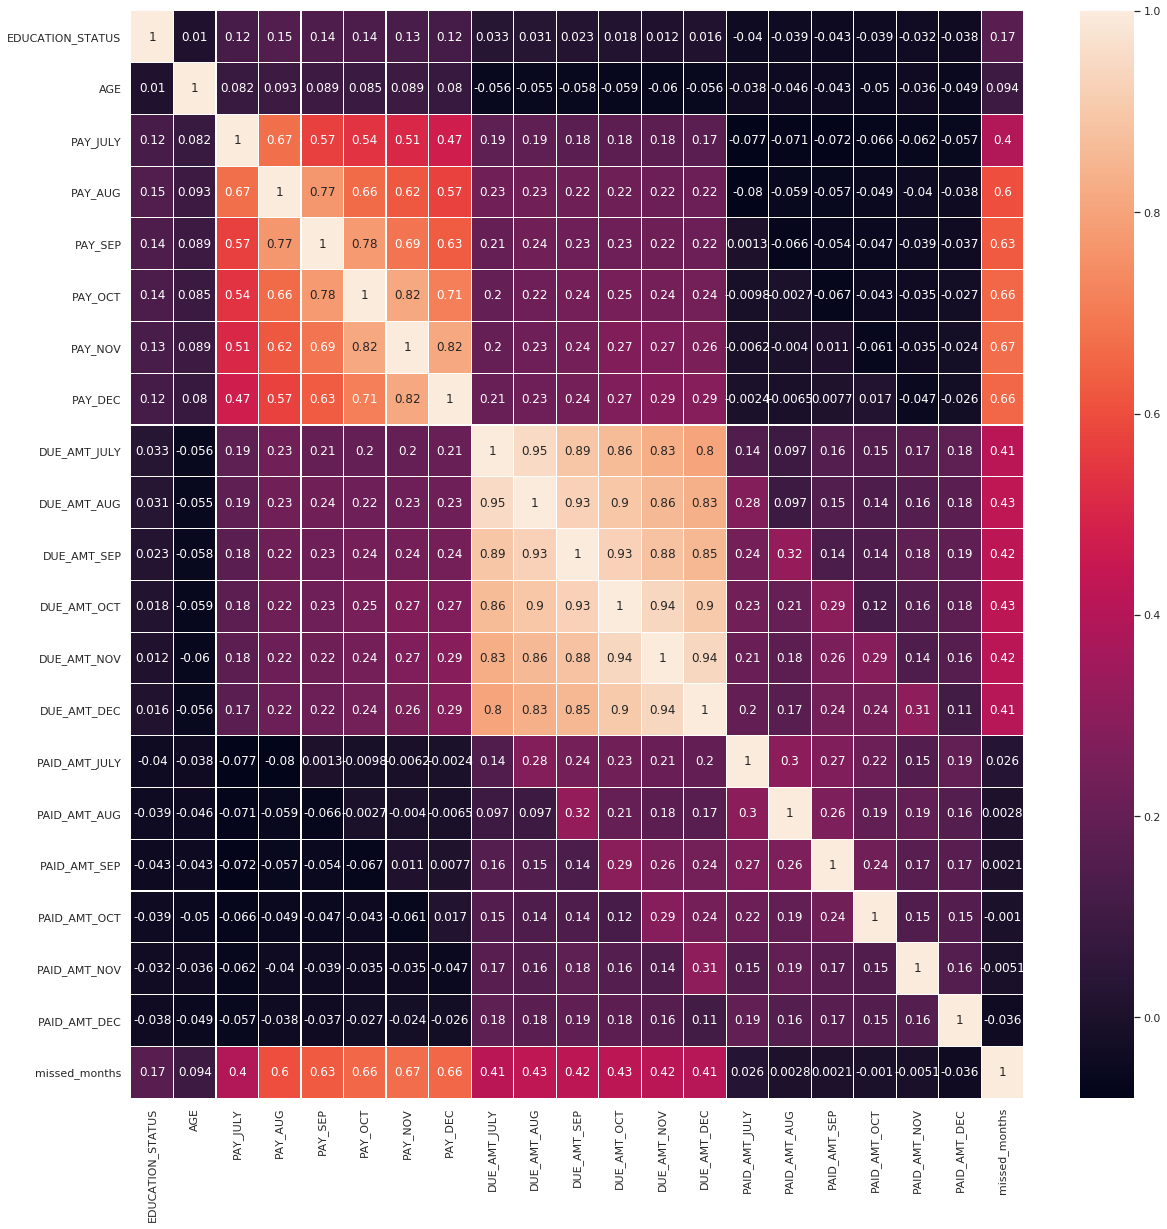

In [0]:
plt.figure(figsize=(20,20))
plt.rcParams["axes.labelsize"] = 20
sns.set(font_scale=1)
sns.heatmap(credit.corr(), annot = True ,linewidths=.1)
plt.show()

Preparing to extract month related data

In [0]:
months_data = credit[["PAY_JULY",	"DUE_AMT_JULY",	"PAID_AMT_JULY","JULYDue_percentage",  "PAY_AUG",	"DUE_AMT_AUG",	"PAID_AMT_AUG","AUGDue_percentage",	"PAY_SEP", "DUE_AMT_SEP",	"PAID_AMT_SEP","SEPDue_percentage",	 "PAY_OCT",	"DUE_AMT_OCT",	"PAID_AMT_OCT","OCTDue_percentage", 	"PAY_NOV",	"DUE_AMT_NOV",	"PAID_AMT_NOV","NOVDue_percentage", 	"PAY_DEC",	"DUE_AMT_DEC",	"PAID_AMT_DEC","DECDue_percentage" 	]]

Extract month related data. Becuase they have to be processed individiually. WE also reshaped as 4 data per 6 months over 24000 data

In [0]:
months_data = min_max_scaler.fit_transform(months_data.values)
print(months_data[0])
months_data = months_data.reshape(24000,6,4)
print(months_data.shape)

[ 0.90162011 -0.47569737 -0.33810042 -0.68281449  1.77423557 -0.47097976
 -0.16370353 -0.67707917  0.13234905 -0.4316369  -0.24061756 -0.60900414
  0.18476319 -0.3970113  -0.24596448 -0.56218343  0.230747   -0.36181347
 -0.24596892 -0.50636296  0.25061934 -0.33593144 -0.23598923 -0.46238637]
(24000, 6, 4)


In [0]:
print(months_data[0])

[[ 0.90162011 -0.47569737 -0.33810042 -0.68281449]
 [ 1.77423557 -0.47097976 -0.16370353 -0.67707917]
 [ 0.13234905 -0.4316369  -0.24061756 -0.60900414]
 [ 0.18476319 -0.3970113  -0.24596448 -0.56218343]
 [ 0.230747   -0.36181347 -0.24596892 -0.50636296]
 [ 0.25061934 -0.33593144 -0.23598923 -0.46238637]]


After the processed we removed the colums from dataframe as we have isolated them

In [0]:
credit= credit.drop(["PAY_JULY",	"DUE_AMT_JULY",	"PAID_AMT_JULY","JULYDue_percentage",  "PAY_AUG",	"DUE_AMT_AUG",	"PAID_AMT_AUG","AUGDue_percentage",	"PAY_SEP", "DUE_AMT_SEP",	"PAID_AMT_SEP","SEPDue_percentage",	 "PAY_OCT",	"DUE_AMT_OCT",	"PAID_AMT_OCT","OCTDue_percentage", 	"PAY_NOV",	"DUE_AMT_NOV",	"PAID_AMT_NOV","NOVDue_percentage", 	"PAY_DEC",	"DUE_AMT_DEC",	"PAID_AMT_DEC","DECDue_percentage" 	],axis=1)

Remaining data in dataframe normalized

In [0]:
raw_data = min_max_scaler.fit_transform(np.asarray(credit.values,dtype=np.float64))

Checking for the bias in output data

In [0]:
import numpy as np
print(np.count_nonzero(output == 1))
print(np.count_nonzero(output == 0))

5330
18670


# Deep Learning

Import neccesary Libraries

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import tensorflow_addons as tfa
import sklearn

Defining input tensors for all isolated datasets

In [0]:
month_input = keras.Input(shape=(6,4),name='month')
gender_input = keras.Input(shape=2,name='gender')
marital_input = keras.Input(shape=2,name='marital')
int_data_input = keras.Input(shape=4,name='intdata')

Code to found f1 score

In [0]:
from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
        precision = precision_m(y_true, y_pred)
        recall = recall_m(y_true, y_pred)
        return 2*((precision*recall)/(precision+recall+K.epsilon()))

Model Creating using keras

In [0]:
def create_model():
  month_conv = keras.layers.Conv1D(4*4*24,4,1,activation='selu',kernel_initializer="lecun_normal" )(month_input)
  month_flatten = keras.layers.Flatten()(keras.layers.Conv1D(4*4*48,3,1,activation='selu',kernel_initializer="lecun_normal" )(month_conv))
  month_processed = keras.layers.Dense(4*4*48,activation='selu',kernel_initializer="lecun_normal")(month_flatten)
  gender_processed = keras.layers.Dense(4*4*8,activation='selu',kernel_initializer="lecun_normal" )(gender_input)
  marital_processed = keras.layers.Dense(4*4*8,activation='selu',kernel_initializer="lecun_normal" )(marital_input)
  int_data_processed = keras.layers.Dense(4*4*16,activation='selu',kernel_initializer="lecun_normal" )(int_data_input)
  x = keras.layers.concatenate([month_processed,gender_processed,marital_processed,int_data_processed])
  inter_model = keras.models.Sequential([
                                        keras.layers.Dense(512,activation='selu',kernel_initializer="lecun_normal" ),
                                        keras.layers.Dropout(0.5),
                                        keras.layers.Dense(256,activation='selu',kernel_initializer="lecun_normal" ),
                                        keras.layers.Dropout(0.5),
                                        keras.layers.Dense(64,activation='selu',kernel_initializer="lecun_normal" ),
                                        keras.layers.Dropout(0.5),
                                        keras.layers.Dense(1,activation='sigmoid',kernel_initializer="lecun_normal" ),
                                        #keras.layers.Dense(1,activation='sigmoid',kernel_initializer=ker_init,bias_initializer=bias_init)
  ])
  Default_prediction = inter_model(x)
  model = keras.models.Model(inputs=[gender_input,month_input,marital_input,int_data_input],outputs=[Default_prediction])
  return model

Defining loss function and optimization algorithms and their regarding hyperparameters. We also used Mirrored Strategy GPU backend distribution training

In [0]:
from tensorflow.keras import regularizers
import os
strategy = tf.distribute.MirroredStrategy()
with strategy.scope():
  model = create_model()
  optimizer = keras.optimizers.RMSprop(5e-5)
  loss=tf.keras.losses.binary_crossentropy
  model.compile(optimizer=optimizer,loss=loss,metrics=['acc',f1_m])

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


Getting a visual idea of the model

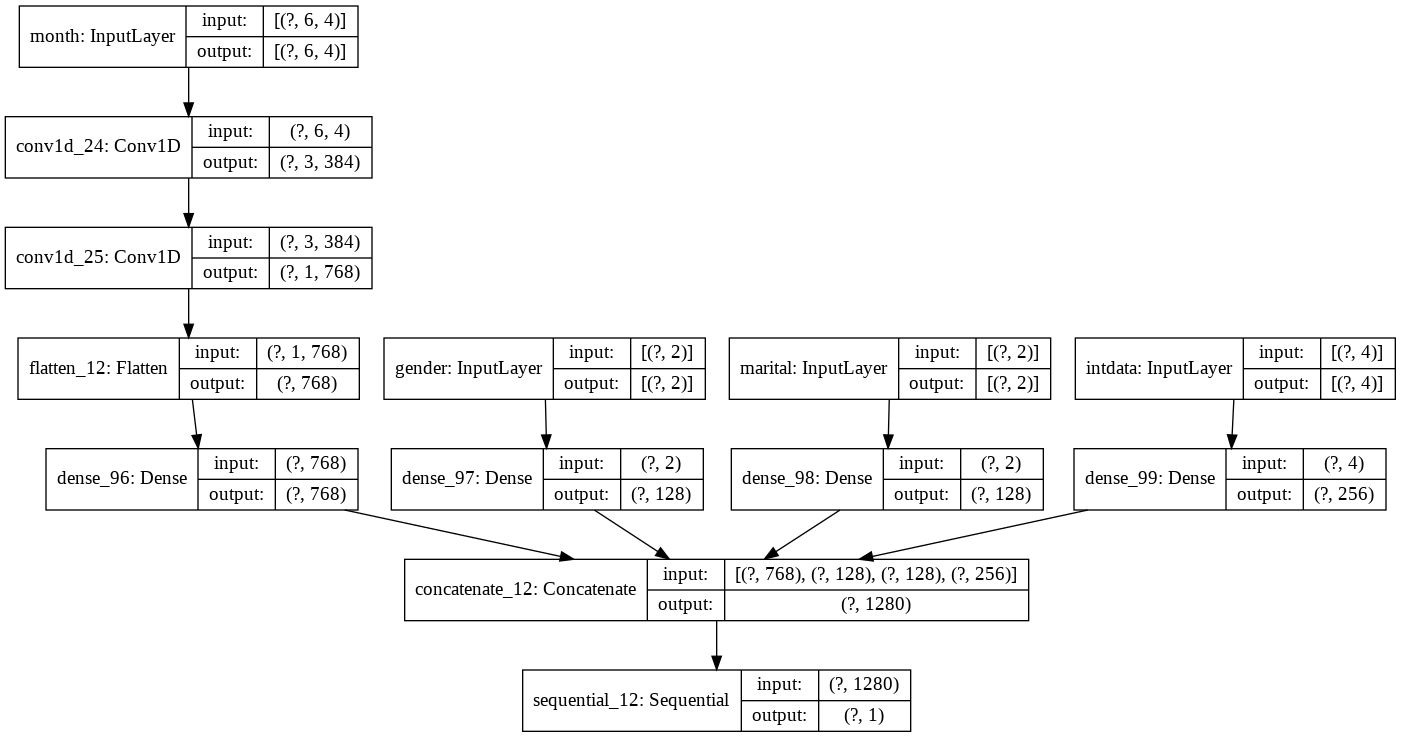

In [0]:
keras.utils.plot_model(model, 'mini_resnet.png', show_shapes=True)

Understand the neuron load in each layer

In [0]:
print(model.summary())

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
month (InputLayer)              [(None, 6, 4)]       0                                            
__________________________________________________________________________________________________
conv1d_24 (Conv1D)              (None, 3, 384)       6528        month[0][0]                      
__________________________________________________________________________________________________
conv1d_25 (Conv1D)              (None, 1, 768)       885504      conv1d_24[0][0]                  
__________________________________________________________________________________________________
flatten_12 (Flatten)            (None, 768)          0           conv1d_25[0][0]                  
___________________________________________________________________________________________

As we are going to Use GPU backend 3000 epochs can be trainbale in less than 30 min

In [0]:
epochs = 3000

Used multiple Callbacks function to optimize the training process.

In [0]:
early_stoping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=epochs, verbose=1, mode='auto', baseline=None, restore_best_weights=True)
reducelr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=epochs//50, verbose=1, mode='auto', min_delta=0.00001, cooldown=0, min_lr=0.0000001)

As the data size is too small (in terms of storage size) We load the maximum batchsize we could load. We splited 20% data for validation. We also used class weight function because as we seen earlier we are using biased data.

In [0]:
batch_size = 4800
with strategy.scope():
  model.fit({'month':months_data,'gender':Gender_1hot_data,'marital':Marital_status_1hot_data,'intdata':raw_data},
            y=output,
            callbacks=[reducelr,early_stoping],
            epochs=epochs,
            shuffle=True,
            class_weight={0:float(np.count_nonzero(output == 1))/(float(np.count_nonzero(output == 1))+float(np.count_nonzero(output == 0))),1:float(np.count_nonzero(output == 0))/(float(np.count_nonzero(output == 1))+float(np.count_nonzero(output == 0)))},
            batch_size=batch_size,
            validation_split=0.2
            )

Streaming output truncated to the last 5000 lines.
Epoch 357/3000
24000/24000 [==============================] - 0s 4us/sample - loss: 0.4721 - acc: 0.8066 - f1_m: 0.4624
Epoch 358/3000
24000/24000 [==============================] - 0s 4us/sample - loss: 0.4713 - acc: 0.8019 - f1_m: 0.4266
Epoch 359/3000
24000/24000 [==============================] - 0s 4us/sample - loss: 0.4732 - acc: 0.8083 - f1_m: 0.4629
Epoch 360/3000
24000/24000 [==============================] - 0s 4us/sample - loss: 0.4701 - acc: 0.7996 - f1_m: 0.4297
Epoch 361/3000
24000/24000 [==============================] - 0s 4us/sample - loss: 0.4689 - acc: 0.8087 - f1_m: 0.4644
Epoch 362/3000
24000/24000 [==============================] - 0s 4us/sample - loss: 0.4727 - acc: 0.7982 - f1_m: 0.4221
Epoch 363/3000
24000/24000 [==============================] - 0s 4us/sample - loss: 0.4737 - acc: 0.8061 - f1_m: 0.4604
Epoch 364/3000
24000/24000 [==============================] - 0s 4us/sample - loss: 0.4737 - acc: 0.7978 - f1

Found the trained model accuracy for the whole train data

In [0]:
with strategy.scope():
  model.evaluate({'month':months_data,'gender':Gender_1hot_data,'marital':Marital_status_1hot_data,'intdata':raw_data},
          y=output,
          #class_weight={0:float(np.count_nonzero(output == 1))/(float(np.count_nonzero(output == 1))+float(np.count_nonzero(output == 0))),1:float(np.count_nonzero(output == 0))/(float(np.count_nonzero(output == 1))+float(np.count_nonzero(output == 0)))},
          batch_size=batch_size)

# Prediction

Load Test dataset and do the same preprocessing all again

In [0]:
test_credit = pd.read_csv('/content/credit_card_default_test.csv')

In [0]:
test_credit.info()

In [0]:
test_credit['limit'] = test_credit.Balance_Limit_V1.copy()

In [0]:
for i in range (len(test_credit['limit'])):
  if (test_credit['limit'][i][-1]=='M'):
    test_credit['limit'][i]=int(float(test_credit['Balance_Limit_V1'][i][:-1])*1000000)
  elif (test_credit['limit'][i][-1]=='K'):
    test_credit['limit'][i]=int(float(test_credit['limit'][i][:-1])*1000)
  else:
    test_credit['limit'][i]=int(test_credit['limit'][i])

In [0]:
test_credit=test_credit.drop('Balance_Limit_V1',axis=1)

In [0]:
months = ["AUG","SEP","OCT","NOV","DEC"]
a=test_credit["DUE_AMT_JULY"].to_numpy()>test_credit["PAID_AMT_JULY"].to_numpy()
a = np.array(a,dtype=np.int32)
for month in months:
  b =test_credit["DUE_AMT_"+month].to_numpy()>test_credit["PAID_AMT_"+month].to_numpy()
  a += np.array(b,dtype=np.int32)
print(a)
test_credit["missed_months"]=a

In [0]:
months = ["JULY","AUG","SEP","OCT","NOV","DEC"]
for month in months:
  test_credit[month+"Due_percentage"]=test_credit["DUE_AMT_"+month]/test_credit['limit']

In [0]:
label_encoder = preprocessing.LabelEncoder()
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

In [0]:
def onehot(data):
  label_encoder = preprocessing.LabelEncoder()
  from sklearn.preprocessing import OneHotEncoder
  cat_encoder = OneHotEncoder()
  encoded = label_encoder.fit_transform(data)
  encoded_1hot=cat_encoder.fit_transform(encoded.reshape(-1,1))
  return encoded_1hot.toarray()

In [0]:
Gender_1hot_data  = onehot(test_credit["Gender"])
test_credit = test_credit.drop("Gender",axis=1)

In [0]:
Marital_status_1hot_data = onehot(test_credit["MARITAL_STATUS"])
print(Marital_status_1hot_data)
test_credit = test_credit.drop("MARITAL_STATUS",axis=1)

In [0]:
test_credit["EDUCATION_STATUS"]=label_encoder.fit_transform(test_credit['EDUCATION_STATUS'])

In [0]:
test_credit["AGE"]=label_encoder.fit_transform(test_credit['AGE'])

In [0]:
test_credit = test_credit.drop("Client_ID",axis=1)
test_credit.head()

In [0]:
min_max_scaler = preprocessing.StandardScaler()
raw_data = min_max_scaler.fit_transform(test_credit.values)

In [0]:
months_data = test_credit[["PAY_JULY",	"DUE_AMT_JULY",	"PAID_AMT_JULY","JULYDue_percentage",  "PAY_AUG",	"DUE_AMT_AUG",	"PAID_AMT_AUG","AUGDue_percentage",	"PAY_SEP", "DUE_AMT_SEP",	"PAID_AMT_SEP","SEPDue_percentage",	 "PAY_OCT",	"DUE_AMT_OCT",	"PAID_AMT_OCT","OCTDue_percentage", 	"PAY_NOV",	"DUE_AMT_NOV",	"PAID_AMT_NOV","NOVDue_percentage", 	"PAY_DEC",	"DUE_AMT_DEC",	"PAID_AMT_DEC","DECDue_percentage" 	]]

In [0]:
months_data = min_max_scaler.fit_transform(months_data.values)
print(months_data)
months_data = months_data.reshape(6000,6,4)
print(months_data.shape)

In [0]:
test_credit= test_credit.drop(["PAY_JULY",	"DUE_AMT_JULY",	"PAID_AMT_JULY","JULYDue_percentage",  "PAY_AUG",	"DUE_AMT_AUG",	"PAID_AMT_AUG","AUGDue_percentage",	"PAY_SEP", "DUE_AMT_SEP",	"PAID_AMT_SEP","SEPDue_percentage",	 "PAY_OCT",	"DUE_AMT_OCT",	"PAID_AMT_OCT","OCTDue_percentage", 	"PAY_NOV",	"DUE_AMT_NOV",	"PAID_AMT_NOV","NOVDue_percentage", 	"PAY_DEC",	"DUE_AMT_DEC",	"PAID_AMT_DEC","DECDue_percentage" 	],axis=1)

In [0]:
raw_data = min_max_scaler.fit_transform(np.asarray(test_credit.values,dtype=np.float64))

In [0]:
with strategy.scope():
  prediction = model.predict({'month':months_data,'gender':Gender_1hot_data,'marital':Marital_status_1hot_data,'intdata':raw_data})

In [0]:
prediction

Write the data into file

In [0]:
output_file = open('output.txt','w')
input_file = open('/content/credit_card_default_test.csv','r')
input_file.readline()
output_file.write("Client_ID,NEXT_MONTH_DEFAULT\n")
for value in prediction:
  output_file.write(input_file.readline().strip().split(',')[0]+","+str(int(round(value[0])))+'\n')
output_file.close()
input_file.close()

In [0]:
prediction.shape